# Part 1 - Scalars and Vectors

For the questions below it is not sufficient to simply provide answer to the questions, but you must solve the problems and show your work using python (the NumPy library will help a lot!) Translate the vectors and matrices into their appropriate python  representations and use numpy or functions that you write yourself to demonstrate the result or property. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 1.1 Create a two-dimensional vector and plot it on a graph

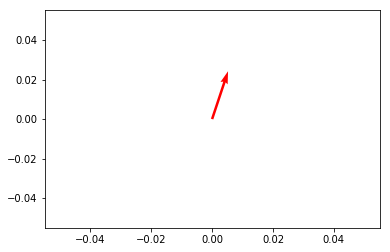

In [31]:
v1 = np.array([1,3])
origin = [0], [0] # origin point
plt.quiver(*origin, v1[0], v1[1], color=['r'], scale=21)
plt.show()

## 1.2 Create a three-dimensional vecor and plot it on a graph

In [32]:
from mpl_toolkits.mplot3d import Axes3D

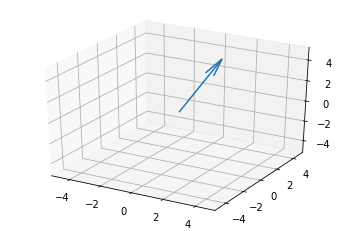

In [33]:
v2 = np.array([1,3,4])
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(0,0,0,v2[0],v2[1],v2[2])
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
plt.show()

## 1.3 Scale the vectors you created in 1.1 by $5$, $\pi$, and $-e$ and plot all four vectors (original + 3 scaled vectors) on a graph. What do you notice about these vectors? 

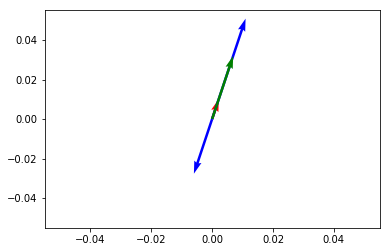

In [56]:
v1 = np.array([1,3])
v2 = v1 * 5
v3 = v1 * np.pi
v4 = v1 * np.e *-1
origin = [0], [0] # origin point
fig = plt.figure()
ax = fig.gca()
ax.quiver(*origin, [v1[0],v2[0],v3[0],v4[0]], [v1[1],v2[1],v3[1],v4[1]], color=['r','b','g','b'],scale=50)

plt.show()

In [57]:
# They are all scalars of each other and are linear dependent

## 1.4 Graph vectors $\vec{a}$ and $\vec{b}$ and plot them on a graph

\begin{align}
\vec{a} = \begin{bmatrix} 5 \\ 7 \end{bmatrix}
\qquad
\vec{b} = \begin{bmatrix} 3 \\4 \end{bmatrix}
\end{align}

In [93]:
a = [5,7]
b = [3,4]

(0, 10)

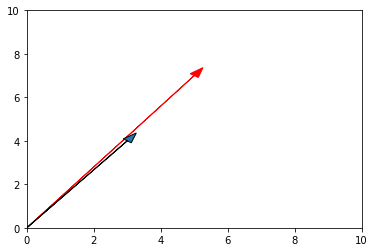

In [94]:
plt.arrow(0,0, a[0],a[1],color='r',head_width=0.3)
plt.arrow(0,0, b[0],b[1],head_width=0.3)
plt.xlim(0,10)
plt.ylim(0,10)

## 1.5 find $\vec{a} - \vec{b}$ and plot the result on the same graph as $\vec{a}$ and $\vec{b}$. Is there a relationship between vectors $\vec{a} \thinspace, \vec{b} \thinspace \text{and} \thinspace \vec{a-b}$

In [96]:
c = np.subtract(a,b)

(0, 10)

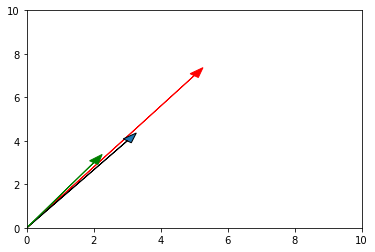

In [97]:
plt.arrow(0,0, a[0],a[1],color='r',head_width=0.3)
plt.arrow(0,0, b[0],b[1],head_width=0.3)
plt.arrow(0,0, c[0],c[1],head_width=0.3, color='g')
plt.xlim(0,10)
plt.ylim(0,10)

In [98]:
# it looks like they are subtracting the x and y, and then plotting both

## 1.6 Find $c \cdot d$

\begin{align}
\vec{c} = \begin{bmatrix}7 & 22 & 4 & 16\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}12 & 6 & 2 & 9\end{bmatrix}
\end{align}


In [99]:
c = [7,22,4,16]
d = [12,6,2,9]

In [100]:
np.dot(c,d)

368

##  1.7 Find $e \times f$

\begin{align}
\vec{e} = \begin{bmatrix} 5 \\ 7 \\ 2 \end{bmatrix}
\qquad
\vec{f} = \begin{bmatrix} 3 \\4 \\ 6 \end{bmatrix}
\end{align}

In [106]:
e=[5,7,2]
f=[3,4,6]

In [108]:
np.cross(e,f)

array([ 34, -24,  -1])

## 1.8 Find $||e||$ and then find $||f||$. Which is longer?

\begin{align}
\vec{e} = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 8 \end{bmatrix}
\qquad
\vec{f} = \begin{bmatrix} 3 \\3 \\ 3 \\ 3 \end{bmatrix}
\end{align}

In [109]:
e=[1,1,1,8]
f=[3,3,3,3]

In [110]:
np.linalg.norm(e)

8.18535277187245

In [111]:
np.linalg.norm(f)

6.0

In [112]:
# e is longer

## 1.9 Show that the following vectors are orthogonal (perpendicular to each other):

\begin{align}
\vec{g} = \begin{bmatrix} 1 \\ 0 \\ -1  \end{bmatrix}
\qquad
\vec{h} = \begin{bmatrix} 1 \\ \sqrt{2} \\ 1 \end{bmatrix}
\end{align}

In [113]:
g = np.array([1,0,-1])

In [114]:
h = np.array([1,np.sqrt(2),1])

In [118]:
# if dot is 0 then they are orthogonal
np.dot(g,h)

0.0

# Part 2 - Matrices

## 2.1 What are the dimensions of the following matrices? Which of the following can be multiplied together? See if you can find all of the different legal combinations.
\begin{align}
A = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}
\qquad
B = \begin{bmatrix}
2 & 4 & 6 \\
\end{bmatrix}
\qquad
C = \begin{bmatrix}
9 & 6 & 3 \\
4 & 7 & 11
\end{bmatrix}
\qquad
D = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\qquad
E = \begin{bmatrix}
1 & 3 \\
5 & 7
\end{bmatrix}
\end{align}

In [131]:
a = np.array([[1,2],[3,4],[5,6]])
b = np.array([2,4,6])
c = np.array([[9,6,3],[4,7,11]])
d = np.array([[1,0,0],[0,1,0],[0,0,1]])
e = np.array([[1,3],[5,7]])

array([9, 6, 3])

In [119]:
'''
a - 3,2
b - 1,3
c - 2,3
d - 3,3
e - 2,2

There are 8 combinations

'''

'\na - 3,2\nb - 1,3\nc - 2,3\nd - 3,3\ne - 2,2\n\nThere are 8 combinations\n\n'

## 2.2 Find the following products: CD, AE, and BA. What are the dimensions of the resulting matrices? How does that relate to the dimensions of their factor matrices?

In [135]:
cd = np.matmul(c,d)
ae = np.matmul(a,e)
ba = np.matmul(b,a)

In [139]:
cd.shape

(2, 3)

In [140]:
ae.shape

(3, 2)

In [141]:
ba.shape

(2,)

In [143]:
# they are the resulting rows of the first one and columns of the second

## 2.3  Find $F^{T}$. How are the numbers along the main diagonal (top left to bottom right) of the original matrix and its transpose related? What are the dimensions of $F$? What are the dimensions of $F^{T}$?

\begin{align}
F = 
\begin{bmatrix}
20 & 19 & 18 & 17 \\
16 & 15 & 14 & 13 \\
12 & 11 & 10 & 9 \\
8 & 7 & 6 & 5 \\
4 & 3 & 2 & 1
\end{bmatrix}
\end{align}

In [144]:
f = np.array([[20,19,18,17],[16,15,14,13],[12,11,10,9],[8,7,6,5],[4,3,2,1]])

In [147]:
f.transpose()

array([[20, 16, 12,  8,  4],
       [19, 15, 11,  7,  3],
       [18, 14, 10,  6,  2],
       [17, 13,  9,  5,  1]])

In [149]:
# they are moved along the diagonal as if you flipped it upside down
# the dimensions are the same

# Part 3 - Square Matrices

## 3.1 Find $IG$ (be sure to show your work) 😃

\begin{align}
G= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\end{align}

In [150]:
g = np.array([[12,11],[7,10]])

In [151]:
g

array([[12, 11],
       [ 7, 10]])

In [174]:
det = np.linalg.det(g)

In [175]:
det

43.0

In [176]:
det = (1/det)

In [177]:
rev_g = np.array([[10,-11],[-7,12]])

In [178]:
ig = det*rev_g

In [179]:
rev_g

array([[ 10, -11],
       [ -7,  12]])

In [181]:
# basically the identity matrix
np.matmul(ig,g)

array([[ 1.00000000e+00,  0.00000000e+00],
       [-2.22044605e-16,  1.00000000e+00]])

## 3.2 Find $|H|$ and then find $|J|$.

\begin{align}
H= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\qquad
J= 
\begin{bmatrix}
0 & 1 & 2 \\
7 & 10 & 4 \\
3 & 2 & 0
\end{bmatrix}
\end{align}


In [182]:
h=np.array([[12,11],[7,10]])

In [186]:
np.linalg.det(h)

43.0

In [184]:
j=np.array([[0,1,2],[7,10,4],[3,2,0]])

In [187]:
np.linalg.det(j)

-19.999999999999996

## 3.3 Find H^{-1} and then find J^{-1}

In [190]:
inv_h = np.linalg.inv(h)

In [191]:
inv_j = np.linalg.inv(j)

## 3.4 Find $HH^{-1}$ and then find $G^{-1}G$. Is $HH^{-1} == G^{-1}G$? Why or Why not?

In [192]:
np.matmul(h,inv_h)

array([[ 1.00000000e+00,  0.00000000e+00],
       [-2.22044605e-16,  1.00000000e+00]])

In [193]:
np.matmul(j,inv_j)

array([[ 1.00000000e+00,  5.55111512e-17,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00, -4.44089210e-16],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [194]:
# no but they are both identity matricies. One is a 2x2 and the other is 3x3

# Stretch Goals: 

A reminder that these challenges are optional. If you finish your work quickly we welcome you to work on them. If there are other activities that you feel like will help your understanding of the above topics more, feel free to work on that. Topics from the Stretch Goals sections will never end up on Sprint Challenges. You don't have to do these in order, you don't have to do all of them. 

- Write a function that can calculate the dot product of any two vectors of equal length that are passed to it.
- Write a function that can calculate the norm of any vector
- Prove to yourself again that the vectors in 1.9 are orthogonal by graphing them. 
- Research how to plot a 3d graph with animations so that you can make the graph rotate (this will be easier in a local notebook than in google colab)
- Create and plot a matrix on a 2d graph.
- Create and plot a matrix on a 3d graph.
- Plot two vectors that are not collinear on a 2d graph. Calculate the determinant of the 2x2 matrix that these vectors form. How does this determinant relate to the graphical interpretation of the vectors?

